# Homework 4: Data Visualization
- **Name**:  Brianna Williams
- **UB Username**: bmw36
- **UB Person Number**:  50256496

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('scatter_data.csv')

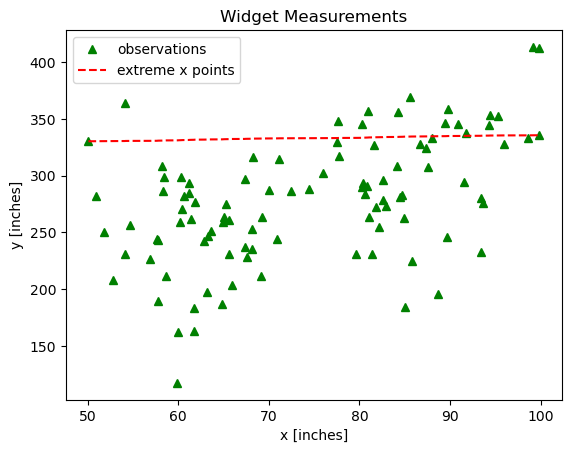

In [5]:
(numRows, numCols)= df.shape
countVal= numRows
x= list(df['% x'])
y= list(df[' y '])
minmax_plot= df.sort_values(['% x', ' y '], ascending=True)
minmax_x= list(minmax_plot['% x'])
miny= list(minmax_plot[0:][' y '].head(1))
maxy= list(minmax_plot[' y '][-99:].tail(1))
minmax_y= list(np.linspace(miny, maxy, countVal))
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.plot(x, y, 'g^', label='observations')
plt.plot(minmax_x, minmax_y, 'r--', label='extreme x points')
plt.legend()

### Problem 2 - Histogram

In [191]:
%matplotlib inline

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [192]:
sg= pd.read_csv('student_grades.csv')
#sg

[Text(0, 0, '3'),
 Text(0, 0, '14'),
 Text(0, 0, '21'),
 Text(0, 0, '28'),
 Text(0, 0, '5')]

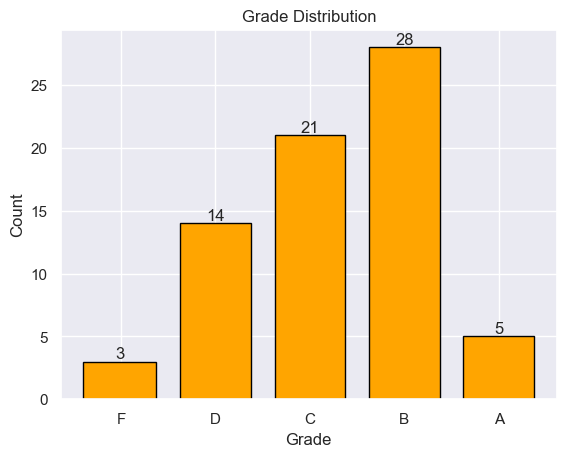

In [193]:
a= list(sg[' avgScore '])
num= [55,65,75,85,95]
Grades= ['F','D','C','B','A']
n, bins, patches = plt.hist(a, bins= [min(a),60,70,80,90,100], density=False, facecolor='orange', edgecolor= 'black',rwidth= 0.75)
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(num, labels=Grades)
plt.bar_label(patches)

#print(n)
#print(bins)

### Problem 3 - Barplot and Boxplot in the Same Figure

In [93]:
%matplotlib inline

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [188]:
sol= pd.read_csv('solution_data.csv')
#sol

[Text(0.5, 1.0, 'Distribution of Gaps'),
 Text(0.5, 0, 'Heuristic Method'),
 [Text(1, 0, 'genetic algorithm'),
  Text(2, 0, 'simulated annealing'),
  Text(3, 0, 'tabu search')]]

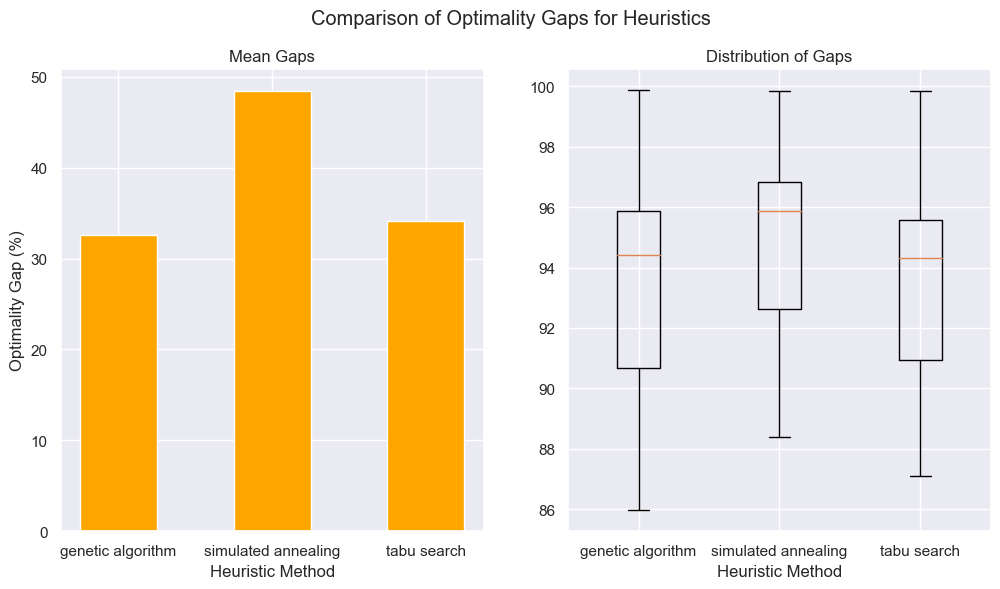

In [187]:
#Data
geneValue= sol['Value'][sol['SolnMethod'] == 'genetic algorithm'].sum()
simValue= sol['Value'][sol['SolnMethod'] == 'simulated annealing'].sum()
tabuValue= sol['Value'][sol['SolnMethod'] == 'tabu search'].sum()
optValue= sol['Value'][sol['SolnMethod'] == 'optimal'].sum()
geneAvg= ((optValue - geneValue)/optValue)*100
simAvg= ((optValue - simValue)/optValue)*100
tabuAvg= ((optValue - tabuValue)/optValue)*100
geneSpread= sol['Value'][sol['SolnMethod'] == 'genetic algorithm']
simSpread= sol['Value'][sol['SolnMethod'] == 'simulated annealing']
tabuSpread= sol['Value'][sol['SolnMethod'] == 'tabu search']
geneOFV= ((optValue-geneSpread)/ optValue) *100
simOFV= ((optValue-simSpread)/ optValue) *100
tabuOFV= ((optValue-tabuSpread)/ optValue) *100

x= list(range(1,4))
y1= [geneAvg, simAvg, tabuAvg]
y2= [geneOFV, simOFV, tabuOFV]
method= ['genetic algorithm','simulated annealing','tabu search']
#Create Subplots 
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Comparison of Optimality Gaps for Heuristics')
# Barplot
ax1.bar(x, y1, tick_label= method, width= 0.5, color= 'orange')
ax1.set(title='Mean Gaps', xlabel= 'Heuristic Method', ylabel= 'Optimality Gap (%)')
# Boxplot
ax2.boxplot(y2)
ax2.set(title= 'Distribution of Gaps', xlabel= 'Heuristic Method', xticklabels= method)

--- 
## Part 2 - Explore New Plot Types

The following data is a record of the NY State Energy Research and Development Authority's (aka NYSERDA) electric vehicle drive clean rebate from 2017 to 2023. According to NYSERDA, NYS Charge NY Initiative provides electric vehicle buyers a "Drive Clean Rebate" up to $2000 for new purchases and leases. This rebate amount is dependant of the vehicle's battery-only range. The plot below is a heatmap which shows the Rebate Amount for various electric vehicle brands monthly. I chose to display this as a heatmap because it is an efficient way to observe any monetary patterns for different Electric Vehicle Brands each month.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/spreadsheet_heatmap.html
- **URL of Sample Data**:  https://catalog.data.gov/dataset/nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
elec= pd.read_csv('NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv', low_memory=False)
elec['Date']= pd.to_datetime(elec['Submitted Date'], infer_datetime_format=True)
elec['Month'] = elec['Date'].dt.strftime('%b')
#elec['Make'].value_counts(dropna = False)
smallnumofMakes= ['Mitsubishi','Chrysler','Audi','Subaru','MINI','Polestar','Mercedes-Benz','Porsche','Smart','Genesis','Lexus','Lincoln','Jaguar','Cadillac','Mazda','Land Rover']
elec= elec[~elec['Make'].isin(smallnumofMakes)]
#elec

<Axes: title={'center': 'Rebate Amount for Electric Vehicle Brands In New York'}, xlabel='Make', ylabel='Month'>

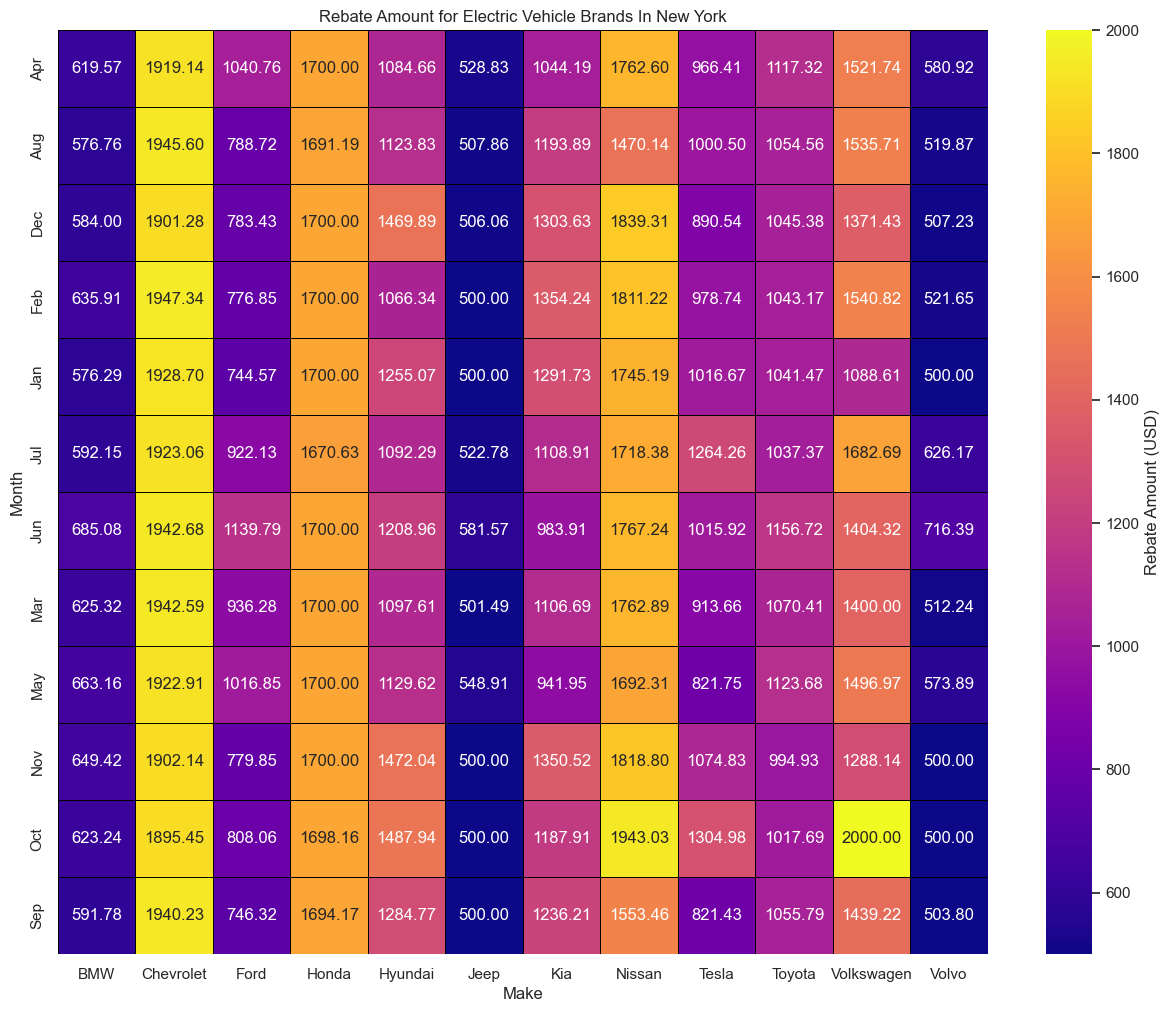

In [79]:
sns.set_theme()
elecVehicle= (elec.pivot_table(index= 'Month', columns= 'Make', values= 'Rebate Amount (USD)'))
elecVehicle= elecVehicle.drop_duplicates()
f, ax = plt.subplots(figsize=(15,12))
ax.set_title('Rebate Amount for Electric Vehicle Brands In New York')
sns.heatmap(elecVehicle, annot= True, fmt= '.2f', linewidths=0.5, linecolor= 'black', cmap= 'plasma', ax=ax, cbar_kws={'label': 'Rebate Amount (USD)'})

Key Elements of the Code Above:
1. When reading the csv file, I got a DtypeWarning which stated "Columns (5) have mixed types" (Column 5 being "County" in this instance). Therefore, as per the recommendation, I set low_Memory to False. 
2. Since this dataset was continously updated after its initial upload in 2020, I decided to use the date submitted for the heatmap. This meant converting the original date format (MM/DD/YY) into the pandas datetime format (YY-MM-DD) and creating a separate column in the dataframe for the month of submission. 
3. Running a heatmap means the arrays for the index and columns must be the same. Since the number of months listed in the dataset is 12, this would mean selecting 12 out of 28 total brands to graph. After running value_counts on the "Make" column, I decided to use the top 12 brands with the highest count. This meant removing the rest of the brands from the dataframe so that the heatmap would only read 2 arrays of 12 items.
4. You can see the current dataframe used for the heatmap by uncommenting "elec".
5. The heatmap code follows the example code provided by seaborn with a few additions:
    - I changed the line which would read the selected arrays as a pivot into a pivot_table and added a drop_duplicates line after this. This was to make reshaping the indexes easier.
    - I made the figure size larger in order to fit all the data without the figure squishing on itself.
6. Aesthetic Changes for the Heatmap:
    - You can change the colormap of heatmap by changing the cmap part of the last line to another preset color scale (colormap reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html).
    - You can change the line width and line color by changing the linewidths and linecolor parts of the last line.